## HW2 - Model Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MatrixMethods as mm
from SingleImage import SingleImage
from ImageBlock import ImageBlock
from BlockSimulation import *
from scipy import linalg as la
from functools import partial


# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

## Part 1 - Simulate block of images with multiple flight strips

In [2]:
# define random seed
np.random.seed(0)

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2, tie_pattern='4 corners', control_pattern='random block',num_control_points=5, rotaions_sigma=10, altitude=1000)

block = a.simulate_block()

In [3]:
len(block.images)

4

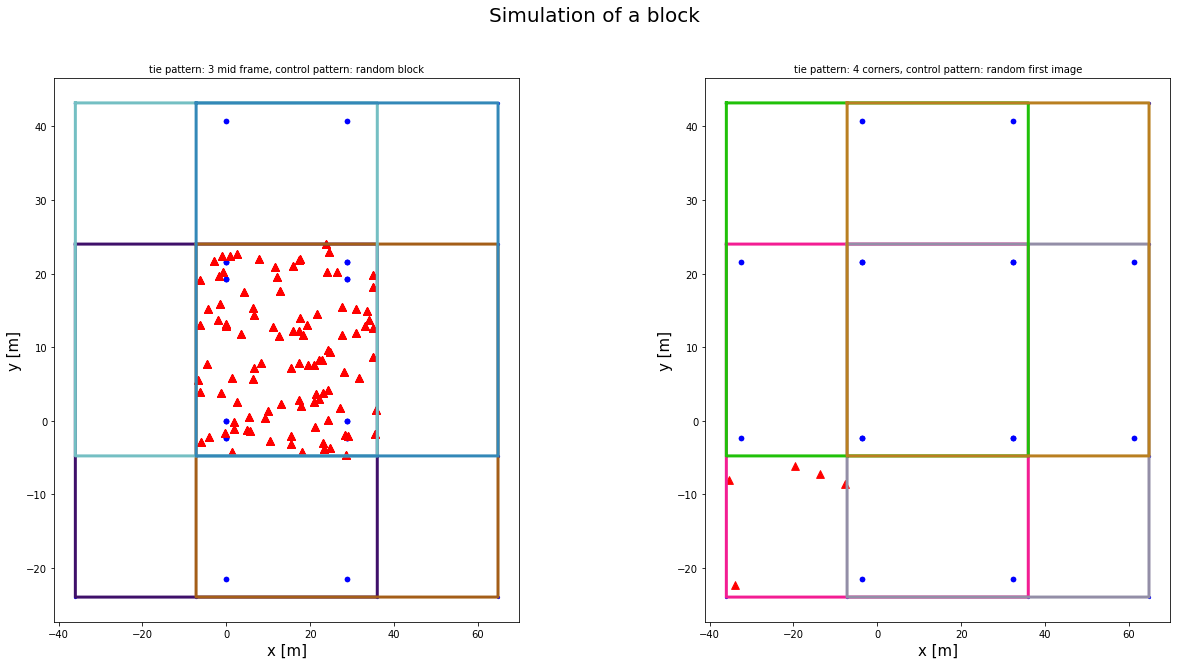

In [4]:
# define random seed
np.random.seed(0)

# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Simulation of a block', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=100, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[0])
# add title to the plot usimg the parameters of the simulation
axes[0].set_title('tie pattern: 3 mid frame, control pattern: random block', fontsize=10)
axes[0].set_xlabel('x [m]', fontsize=15)
axes[0].set_ylabel('y [m]', fontsize=15)
# axes[0].axis('equal')

np.random.seed(0)
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='4 corners', control_pattern='random first image', num_control_points=5, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[1])
axes[1].set_title('tie pattern: 4 corners, control pattern: random first image', fontsize=10)
axes[1].set_xlabel('x [m]', fontsize=15)
axes[1].set_ylabel('y [m]', fontsize=15)
# axes[1].axis('equal')

plt.show()
# fig.savefig('Simulation of a block.png')


## Calculate condition number of the block

<Axes: >

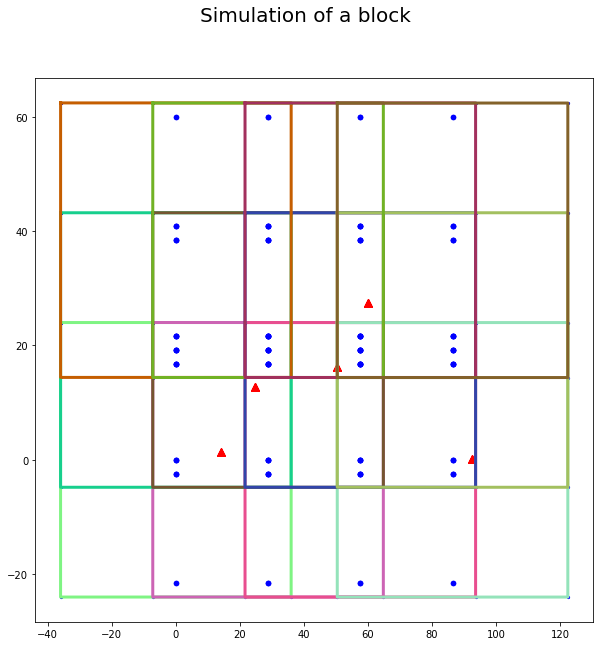

In [5]:
# define random seed
np.random.seed(0)
# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Simulation of a block', fontsize=20)
# simulate a block
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=4, num_strips=3,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=5, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
# plot the block
block.draw_block(ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

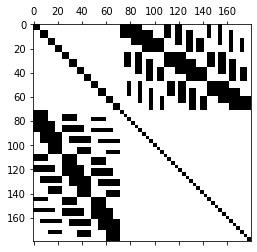

In [6]:
lb = block.create_lb_vector()
X = block.compute_variables_vector()
l0 = block.compute_observation_vector()
L = lb - l0
A = block.ComputeDesignMatrix()
N = np.dot(A.T, A)
plt.spy(N)
plt.show

In [7]:
# compute the eigenvalues of N
eigvals = la.eigvals(N)
# print(eigvals)
# compute the condition number of N
cond = np.max(eigvals)/np.min(eigvals)
cond

(741817490.5116329+0j)

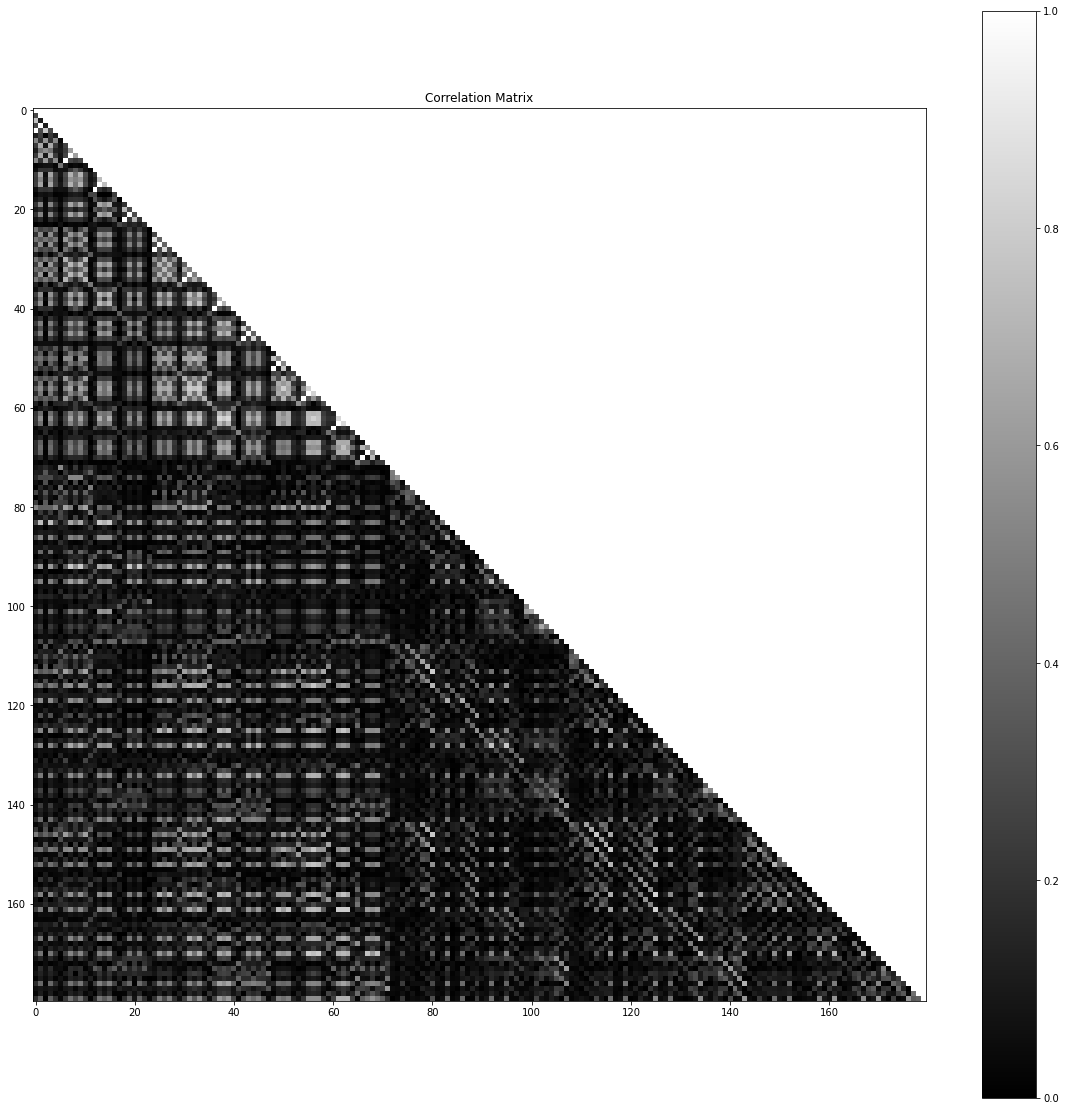

In [22]:
# compute the covariance matrix
Cov = np.linalg.inv(N)

# compute the correlation matrix
diag_sqrt = np.sqrt(np.diag(Cov))
correlation_matrix = Cov / np.outer(diag_sqrt, diag_sqrt)

# Mask the upper triangle of the correlation matrix
mask = np.tri(correlation_matrix.shape[0], k=-1).astype(bool).T
correlation_matrix = np.ma.array(correlation_matrix, mask=mask)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

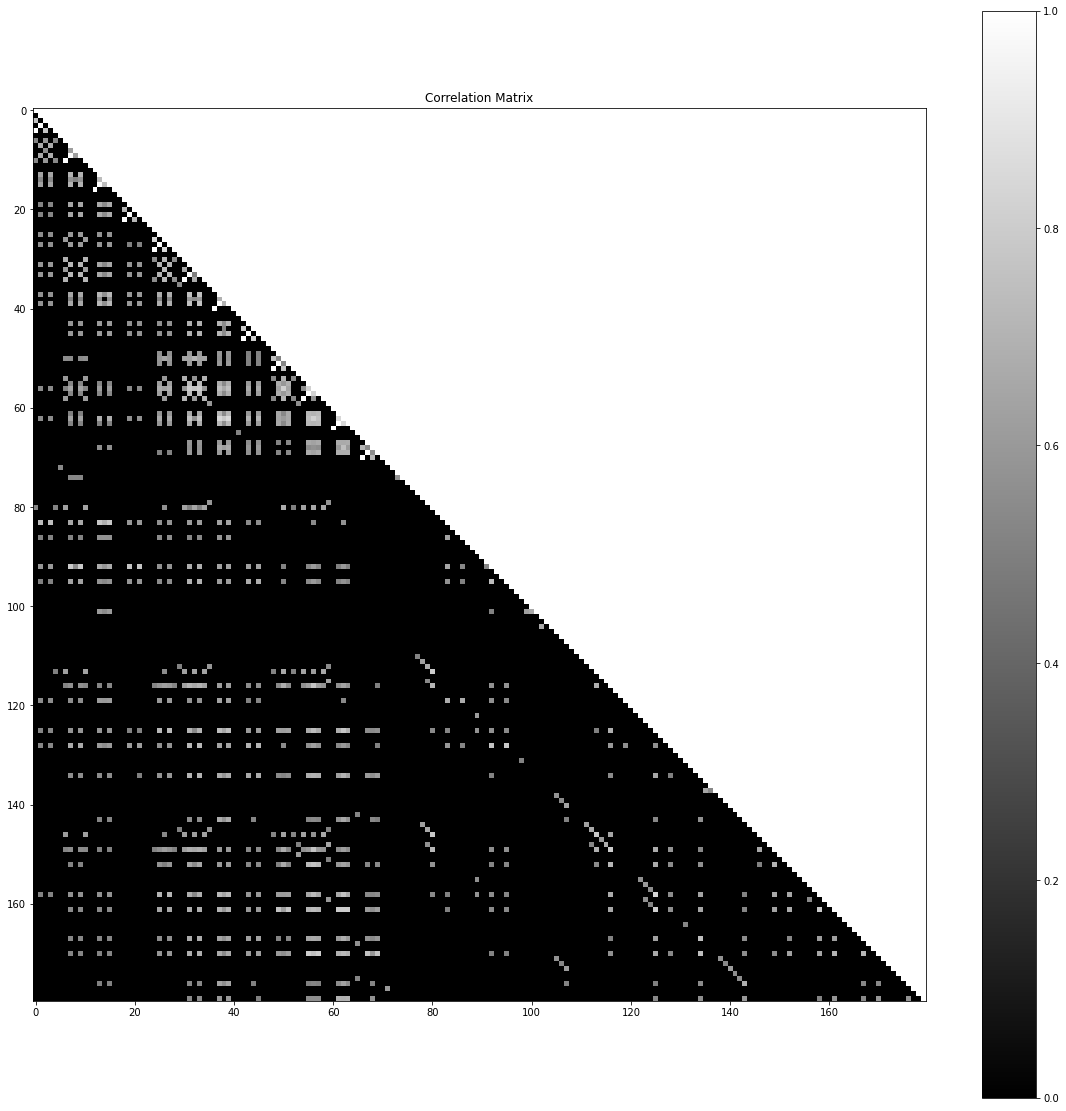

In [23]:
# Mask the values with absolute value lower than 0.5
correlation_matrix[np.abs(correlation_matrix) <= 0.5]=0
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()